In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('test_and_train_installs/train_data_encoded.csv')
test = pd.read_csv('test_and_train_installs/test_data_encoded.csv')

train2 = pd.read_csv('test_and_train_installs/train_data_encoded2.csv')
test2 = pd.read_csv('test_and_train_installs/test_data_encoded2.csv')

train3 = pd.read_csv('test_and_train_installs/train_data_encoded3.csv')
test3 = pd.read_csv('test_and_train_installs/test_data_encoded3.csv')

train4 = pd.read_csv('test_and_train_installs/train_data_encoded4.csv')
test4 = pd.read_csv('test_and_train_installs/test_data_encoded4.csv')

In [3]:
ref_hashes = train['ref_hash']
del train['ref_hash']
del test['ref_hash']

del train2['ref_hash']
del test2['ref_hash']

del train3['ref_hash']
del test3['ref_hash']

del train4['ref_hash']
del test4['ref_hash']

In [4]:
Xtrain, ytrain = train.iloc[:,:-1],train.iloc[:,-1]
Xtest, ytest = test.iloc[:,:-1],test.iloc[:,-1]

Xtrain2, ytrain2 = train2.iloc[:,:-1],train2.iloc[:,-1]
Xtest2, ytest2 = test2.iloc[:,:-1],test2.iloc[:,-1]

Xtrain3, ytrain3 = train3.iloc[:,:-1],train3.iloc[:,-1]
Xtest3, ytest3 = test3.iloc[:,:-1],test3.iloc[:,-1]

Xtrain4, ytrain4 = train4.iloc[:,:-1],train4.iloc[:,-1]
Xtest4, ytest4 = test4.iloc[:,:-1],test4.iloc[:,-1]

In [5]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 10)

In [6]:
# Entrenamiento
xg_reg.fit(Xtrain,ytrain)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [7]:
# Prediccion
preds = xg_reg.predict(Xtest)

In [8]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 79205.751129


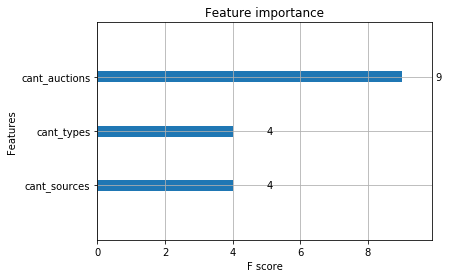

In [9]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [10]:
df_predicciones = pd.DataFrame(ref_hashes)
df_predicciones['predictions_v1'] = preds
df_predicciones['ytest_v1'] = ytest
df_predicciones

,ref_hash,predictions_v1,ytest_v1
0,1000169251625791246_st,83354.335938,167776.943525
1,1000395625957344683_st,83749.335938,146573.807116
2,1003027494996471685_st,83354.335938,73885.989196
3,1006670001679961544_st,168745.031250,259200.000000
4,1007573308966476713_st,83354.335938,186611.246260
5,1010070503877148763_st,83749.335938,146233.135303
6,1010265377387765028_st,84423.585938,53093.115074
7,1010531372912327058_st,83749.335938,139566.262287
8,1011610998357271358_st,168745.031250,259200.000000
9,1013543838965040946_st,83749.335938,191095.993332


In [15]:
train2.head()

,cant_auctions,cant_sources,cant_types,time_to_auction,ref_hash,pred_18_20
0,11.0,3.0,1.0,60392.704839,1000169251625791246_st,83354.335938
1,16.0,5.0,1.0,32513.018477,1000395625957344683_st,83749.335938
2,3.0,2.0,1.0,218561.153171,1003027494996471685_st,83354.335938
3,NaN,NaN,NaN,259200.000000,1006670001679961544_st,168745.031250
4,2.0,1.0,1.0,135246.138200,1007573308966476713_st,83354.335938


In [12]:
train2['ref_hash'] = ref_hashes
train2['pred_18_20'] = preds
Xtrain2 = train2[['cant_installs','cant_wifi_installs', 'device_brand', 'device_model', 'application_id', 'pred_18_20']]
ytrain2 = train2[['time_to_install']]





KeyError: "['cant_installs' 'cant_wifi_installs' 'device_brand' 'device_model'\n 'application_id'] not in index"

In [13]:
test2['ref_hash'] = ref_hashes
test2['pred_18_20'] = preds
Xtest2 = test2[['cant_installs','cant_wifi_installs', 'device_brand', 'device_model', 'application_id', 'pred_18_20']]
ytest2 = test2[['time_to_install']]

KeyError: "['cant_installs' 'cant_wifi_installs' 'device_brand' 'device_model'\n 'application_id'] not in index"

In [ ]:
# Entrenamiento 2
xg_reg.fit(Xtrain2,ytrain2)

In [ ]:
# Prediccion 3
preds2 = xg_reg.predict(Xtest2)

In [ ]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest2, preds2))
print("RMSE: %f" % (rmse))

In [ ]:
df_predicciones['predictions_v2'] = preds2
df_predicciones['ytest_v2'] = ytest2
df_predicciones

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [ ]:
train3['ref_hash'] = ref_hashes
train3['pred_18_20'] = preds
train3['pred_19_21'] = preds2
Xtrain3 = train3[['cant_installs','cant_wifi_installs', 'device_brand', 'device_model', 'application_id', 'pred_18_20', 'pred_19_21']]
ytrain3 = train3[['time_to_install']]

test3['ref_hash'] = ref_hashes
test3['pred_18_20'] = preds
test3['pred_19_21'] = preds2
Xtest3 = test3[['cant_installs','cant_wifi_installs', 'device_brand', 'device_model', 'application_id', 'pred_18_20', 'pred_19_21']]
ytest3 = test3[['time_to_install']]

In [ ]:
# Entrenamiento 3
xg_reg.fit(Xtrain3,ytrain3)

In [ ]:
# Prediccion 3
preds3 = xg_reg.predict(Xtest3)

In [ ]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest3, preds3))
print("RMSE: %f" % (rmse))

In [ ]:
df_predicciones['predictions_v3'] = preds3
df_predicciones['ytest_v3'] = ytest3
df_predicciones

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [ ]:
train4['ref_hash'] = ref_hashes
train4['pred_18_20'] = preds
train4['pred_19_21'] = preds2
train4['pred_20_22'] = preds3
Xtrain4 = train4[['cant_installs','cant_wifi_installs', 'device_brand', 'device_model', 'application_id', 'pred_18_20', 'pred_19_21', 'pred_20_22']]
ytrain4 = train4[['time_to_install']]

test4['ref_hash'] = ref_hashes
test4['pred_18_20'] = preds
test4['pred_19_21'] = preds2
test4['pred_20_22'] = preds3
Xtest4 = test4[['cant_installs','cant_wifi_installs', 'device_brand', 'device_model', 'application_id', 'pred_18_20', 'pred_19_21', 'pred_20_22']]
ytest4 = test4[['time_to_install']]

In [ ]:
# Entrenamiento 4
xg_reg.fit(Xtrain4,ytrain4)

In [ ]:
# Prediccion 4
preds4 = xg_reg.predict(Xtest4)

In [ ]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest4, preds4))
print("RMSE: %f" % (rmse))

In [ ]:
df_predicciones['predictions_v4'] = preds4
df_predicciones['ytest_v4'] = ytest4
df_predicciones

In [ ]:
df2 = pd.DataFrame(ref_hashes)
df2['predictions'] = (df_predicciones['predictions_v1'] + df_predicciones['predictions_v2'] + df_predicciones['predictions_v3'] + df_predicciones['predictions_v4']) / 4
df2.to_csv('submit_kaggle/pred_installs.csv', index=False)

In [ ]:
df2